In [21]:
import numpy as np
import pandas as pd
from utils.data import load_tc_data
from utils.plot import make_cmap
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr

# TODO: be sure about what's going on with inverted lats
# TODO: why are there blank images still?
# TODO: may need to look at generate_predictins_2 script to make sure the correct images are flipped

# If you have/make the file ~/.ssh/config, you can define settings to ssh from local to a BP node e.g.:
# Host bluepebble
# User yourusername
# Hostname bp1-login.acrc.bris.ac.uk
# PreferredAuthentications publickey
# ProxyCommand ssh yourusername@seis.bris.ac.uk nc %h %p

# Host bluepebble1
# User yourusername
# Hostname bp1-login01.acrc.bris.ac.uk
# PreferredAuthentications publickey
# ProxyCommand ssh yourusername@seis.bris.ac.uk nc %h %p
# Then start a notebook and make a local connection with something like:
# PORT=1234
# ssh -f -N -L 8080:localhost:$PORT bluepebble1
# ssh bluepebble1 "module load lang/python/anaconda; jupyter notebook --no-browser --port=$PORT"
# (choose a number that's likely to be unique to you for PORT. You can also insert a command to activate a given conda env after the model load part)

In [22]:
era5,era5_real,era5_input,era5_meta,mswep,mswep_real,mswep_input,mswep_meta = load_tc_data(set='extreme_valid',results='era5')

In [3]:
print(era5.shape)
print(era5[1,:,:,0])

(6553, 100, 100, 20)
[[0.07968926 0.07249109 0.04549441 ... 0.71894234 0.7677114  0.22699262]
 [0.02041476 0.0133374  0.01356226 ... 1.27567148 1.14909291 0.52904111]
 [0.0136312  0.00585604 0.01095235 ... 1.23926401 1.35797298 0.91777468]
 ...
 [0.81396151 0.6224981  0.34888092 ... 0.37856537 0.29461381 0.33178356]
 [0.35610321 0.47102115 0.53784156 ... 0.42852002 0.35262397 0.48146158]
 [0.4919017  1.21504152 1.89329123 ... 0.49347869 0.48593128 0.52346921]]


In [23]:
precip_cmap,precip_norm = make_cmap()

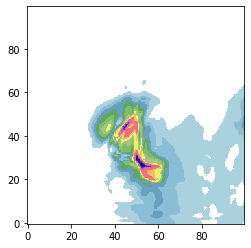

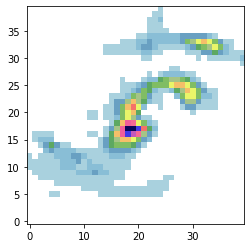

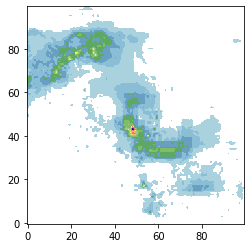

[63 63 '1998076S11170' -13.1112 164.61]


In [33]:
j = 2021
plt.imshow(era5[j,:,:,0],cmap=precip_cmap)
plt.gca().invert_yaxis()
plt.show()
plt.imshow(era5_input[j,:,:],cmap=precip_cmap)
plt.gca().invert_yaxis()
plt.show()
plt.imshow(era5_real[j,:,:],cmap=precip_cmap)
plt.gca().invert_yaxis()
plt.show()
print(era5_meta.values[j,:])


In [34]:
era5_real = np.load('/user/home/al18709/work/tc_data_era5_flipped/extreme_valid_y.npy')
era5_input = np.load('/user/home/al18709/work/tc_data_era5_flipped/extreme_valid_X.npy')

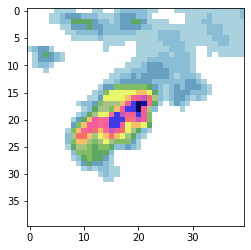

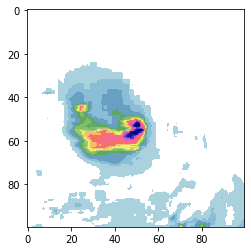

In [16]:
plt.imshow(era5_input[5,:,:],cmap=precip_cmap)
plt.show()
plt.imshow(era5_real[5,:,:],cmap=precip_cmap)
plt.show()

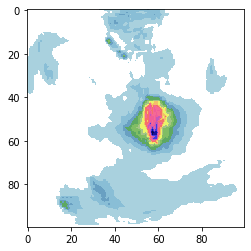

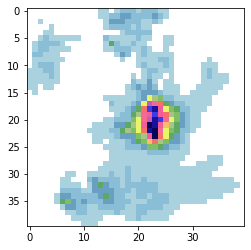

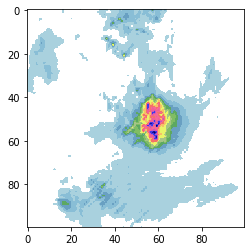

[36 36 '2012296N06135' 11.0796 124.568]


In [18]:
i = 400
plt.imshow(mswep[i,:,:,0],cmap=precip_cmap)
plt.show()
plt.imshow(mswep_input[i,:,:],cmap=precip_cmap)
plt.show()
plt.imshow(mswep_real[i,:,:],cmap=precip_cmap)
plt.show()
print(mswep_meta.values[i,:])

[ 50  49  48  47  46  45  44  43  42  41  40  39  38  37  36  35  34  33
  32  31  30  29  28  27  26  25  24  23  22  21  20  19  18  17  16  15
  14  13  12  11  10   9   8   7   6   5   4   3   2   1   0  -1  -2  -3
  -4  -5  -6  -7  -8  -9 -10 -11 -12 -13 -14 -15 -16 -17 -18 -19 -20 -21
 -22 -23 -24 -25 -26 -27 -28 -29 -30 -31 -32 -33 -34 -35 -36 -37 -38 -39
 -40 -41 -42 -43 -44 -45 -46 -47 -48 -49]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


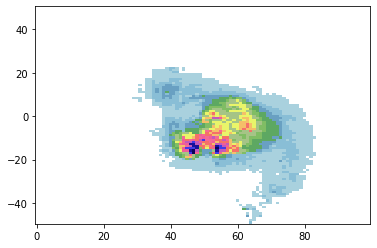

In [ ]:
lats = np.arange(50,-50,-1)
lons = np.arange(0,100,1)

print(lats)
print(lons)

lat2d,lon2d = np.meshgrid(lats,lons)
# data = data.where(data>0.00001)

# plot
fig, ax = plt.subplots()

c = ax.pcolor(lon2d,lat2d,mswep_real[i,:,:],cmap = precip_cmap)
plt.show()



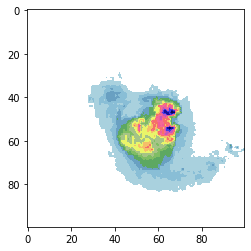

In [ ]:
plt.imshow(mswep_real[i,:,:],cmap=precip_cmap)
plt.show()

In [35]:
era5_flipped_X = np.load('/user/home/al18709/work/tc_data_era5_flipped/extreme_valid_X.npy')
era5_flipped_y = np.load('/user/home/al18709/work/tc_data_era5_flipped/extreme_valid_y.npy')

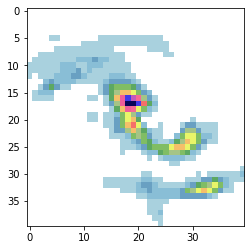

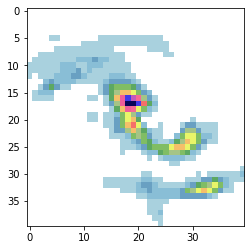

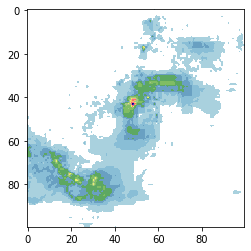

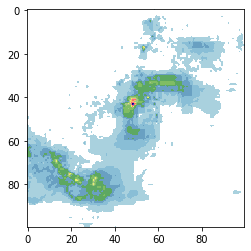

In [37]:
plt.imshow(era5_flipped_X[j,:,:],cmap=precip_cmap)
plt.show()
plt.imshow(era5_input[j,:,:],cmap=precip_cmap)
plt.show()
plt.imshow(era5_flipped_y[j,:,:],cmap=precip_cmap)
plt.show()
plt.imshow(era5_real[j,:,:],cmap=precip_cmap)
plt.show()

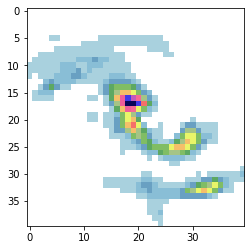

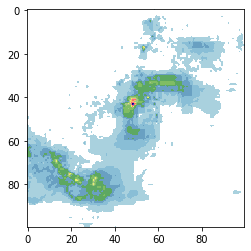

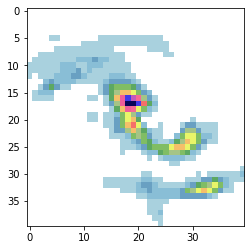

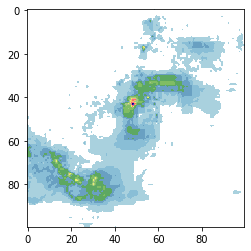

[63 63 '1998076S11170' -13.1112 164.61]


In [49]:
X = np.load('/user/work/al18709/tc_data_era5_flipped_40/extreme_valid_X.npy')
y = np.load('/user/work/al18709/tc_data_era5_flipped_40/extreme_valid_y.npy')
j=2021
plt.imshow(X[j,:,:],cmap=precip_cmap)
plt.show()
plt.imshow(y[j,:,:],cmap=precip_cmap)
plt.show()


plt.imshow(era5_input[j,:,:],cmap=precip_cmap)
plt.show()
plt.imshow(era5_real[j,:,:],cmap=precip_cmap)
plt.show()

print(era5_meta.values[j,:])

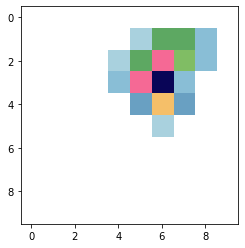

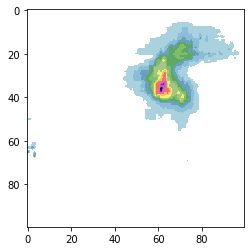

2015209N07248


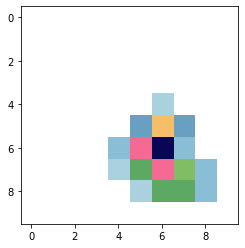

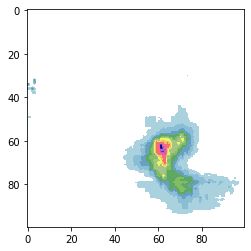

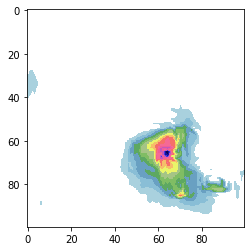

2015209N07248


In [15]:
X = np.load('/user/work/al18709/tc_data_flipped/valid_X.npy')
y = np.load('/user/work/al18709/tc_data_flipped/valid_y.npy')
meta = pd.read_csv('/user/work/al18709/tc_data_mswep/valid_meta.csv')
j=250
plt.imshow(X[j,:,:],cmap=precip_cmap)
plt.show()
plt.imshow(y[j,:,:],cmap=precip_cmap)
plt.show()
print(meta['sid'][j])

real,inputs,pred_cnn,pred_vaegan,pred_gan,pred_ensemble_vaegan,pred_ensemble_gan,meta = load_tc_data(set='validation',results='test')
ax = plt.imshow(inputs[j,:,:],cmap=precip_cmap)
# plt.gca().invert_yaxis()
plt.show()
plt.imshow(real[j,:,:],cmap=precip_cmap)
plt.show()
plt.imshow(pred_gan[j,:,:],cmap=precip_cmap)
plt.show()
print(meta['sid'][j])



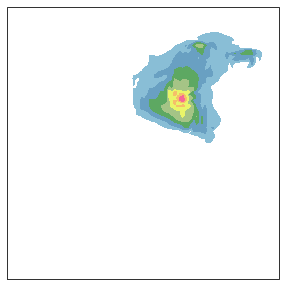

<xarray.Dataset>
Dimensions:        (time: 1, lon: 3600, lat: 1800)
Coordinates:
  * time           (time) datetime64[ns] 2000-12-07
  * lon            (lon) float32 -179.9 -179.8 -179.8 ... 179.8 179.9 179.9
  * lat            (lat) float32 -89.95 -89.85 -89.75 ... 89.75 89.85 89.95
Data variables:
    precipitation  (time, lat, lon) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Fri Dec 24 14:55:41 2021: cdo invertlat /bp1store/geog-trop...
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...
lon shape:  (3600,)
lat shape:  (1800,)
lon2d shape:  (1800, 3600)
lat2d.shape:  (1800, 3600)


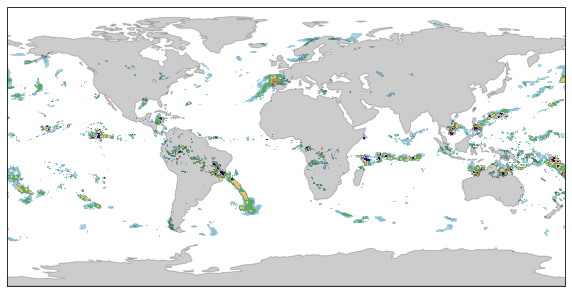

In [18]:

import cartopy.feature as cfeature

fp = '/bp1store/geog-tropical/data/Obs/MSWEP/3hourly_invertlat/2000342.00.nc'
d = xr.load_dataset(fp)
lat = d['lat'][:100] #lat
lon = d['lon'][:100] #lon
# lat2d,lon2d = np.meshgrid(lat,lon)
lon2d,lat2d = np.meshgrid(lon,lat)
fig, ax = plt.subplots(1, 1, figsize=(5, 5), sharey=False,subplot_kw={'projection': ccrs.PlateCarree()})
c = ax.contourf(lon2d,lat2d,pred_gan[j,:,:],vmin=0,vmax=60,cmap = precip_cmap, transform=ccrs.PlateCarree())
plt.show()

fp = '/bp1store/geog-tropical/data/Obs/MSWEP/3hourly_invertlat/2000342.00.nc'
d = xr.load_dataset(fp)
print(d)
lat = d['lat'][:] #lat
lon = d['lon'][:] #lon
# lat2d,lon2d = np.meshgrid(lat,lon)
lon2d,lat2d = np.meshgrid(lon,lat)
print('lon shape: ',lon.shape)
print('lat shape: ',lat.shape)
print('lon2d shape: ',lon2d.shape)
print('lat2d.shape: ',lat2d.shape)
fig, ax = plt.subplots(1, 1, figsize=(10, 10), sharey=False,subplot_kw={'projection': ccrs.PlateCarree()})
c = ax.contourf(lon2d,lat2d,d.precipitation[0],levels=[0,1,2,3,5,10,20,25,30],vmin=0,vmax=30,cmap = precip_cmap, transform=ccrs.PlateCarree())
# ax.add_feature(cfeature.COASTLINE,linewidth=0.5)
ax.add_feature(cfeature.LAND,color='k',alpha=0.2,zorder=1)

# print(lat)
# print(lon)